# Name: Raghuram Palaniappan

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

The goal is to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective
To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
)

import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [2]:
data = pd.read_csv("Loan_Modelling.csv")

## Data Overview

In [3]:
df = data
data = data.drop(['ID'], axis=1)

In [4]:
data.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [8]:
data.shape

(5000, 13)

In [9]:
data.dtypes

Age                     int64
Experience              int64
Income                  int64
ZIPCode                 int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal_Loan           int64
Securities_Account      int64
CD_Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [10]:
data.describe()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


#### Observations: Excluding the ID column, there are 13 columns with 5000 rows. All of the variables are represented with intergers , however some of the variables are categorical. This encoding is important so our Machine Learning models can read these variables.

## Data Preprocessing

In [6]:
data["Experience"].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43], dtype=int64)

In [7]:
data[data["Experience"] < 0]["Experience"].unique()

array([-1, -2, -3], dtype=int64)

In [4]:
# Correcting the experience values
data["Experience"].replace(-1, 1, inplace=True)
data["Experience"].replace(-2, 2, inplace=True)
data["Experience"].replace(-3, 3, inplace=True)

#### Observations: There cannot be negative years of experience. The values are changed to 1, 2, and 3 to make sure the model has data that is accurately represented.

In [9]:
data["Education"].unique()

array([1, 2, 3], dtype=int64)

In [4]:
# checking the number of uniques in the zip code
data["ZIPCode"].nunique()

467

In [5]:
data["ZIPCode"] = data["ZIPCode"].astype(str)
print(
    "Number of unique values if we take first two digits of ZIPCode: ",
    data["ZIPCode"].str[0:2].nunique(),
)
data["ZIPCode"] = data["ZIPCode"].str[0:2]

data["ZIPCode"] = data["ZIPCode"].astype("category")

Number of unique values if we take first two digits of ZIPCode:  7


#### Observations: The ZIPCode acts as a categorical variable. This means it is important to turn the zip code data into a string instead of an interger. The ZIPCode is simplified by making them as groups based on their first 2 digits. This allows the model to have easier interpretability and creatability since there is 7 groups instead of 467.

In [6]:
cat_cols = [
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
    "ZIPCode",
]
data[cat_cols] = data[cat_cols].astype("category")

In [7]:
data.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Exploratory Data Analysis (EDA)

### Univariate Analysis

In [6]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [9]:
def labeled_barplot(data, feature, perc=False, n=None):
    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

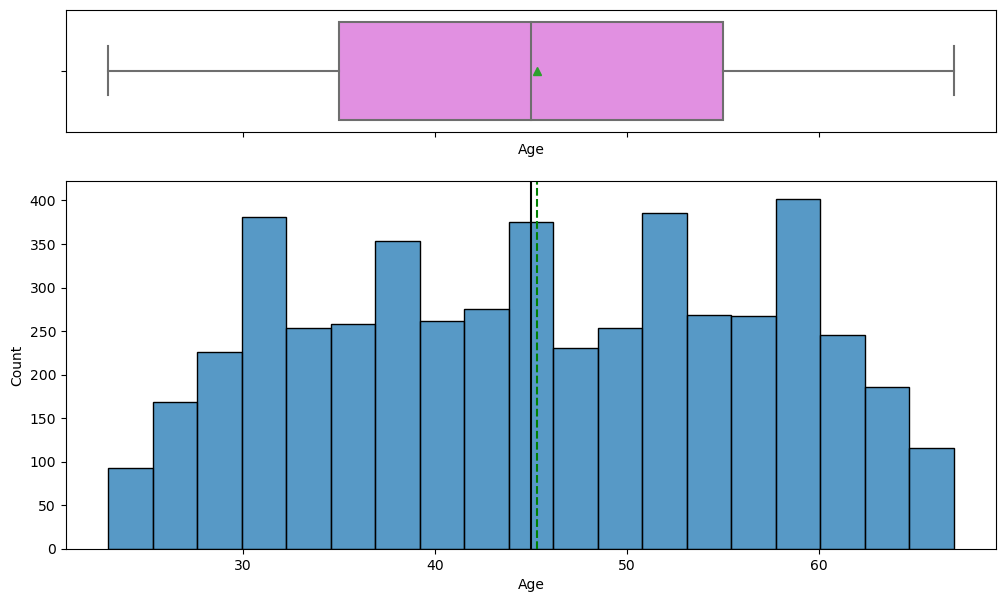

In [20]:
histogram_boxplot(data, "Age")

#### Observations: The data has a rather symmetrical shape with 5 modal peaks spotted. It is hard to determine a strong skew to either side. Alongside this the Ages within the data show no outliers.

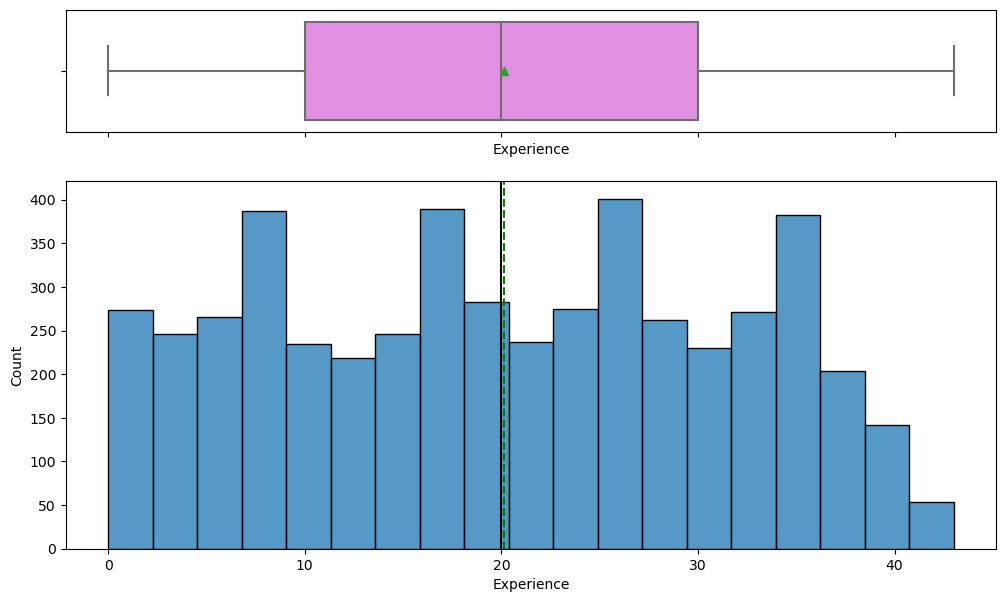

In [27]:
histogram_boxplot(data, 'Experience')

#### Observations: The data also has a rather symmetrical shape like Age with 4 modal peaks spotted. It is hard to determine a strong skew to either side with no outliers once again.

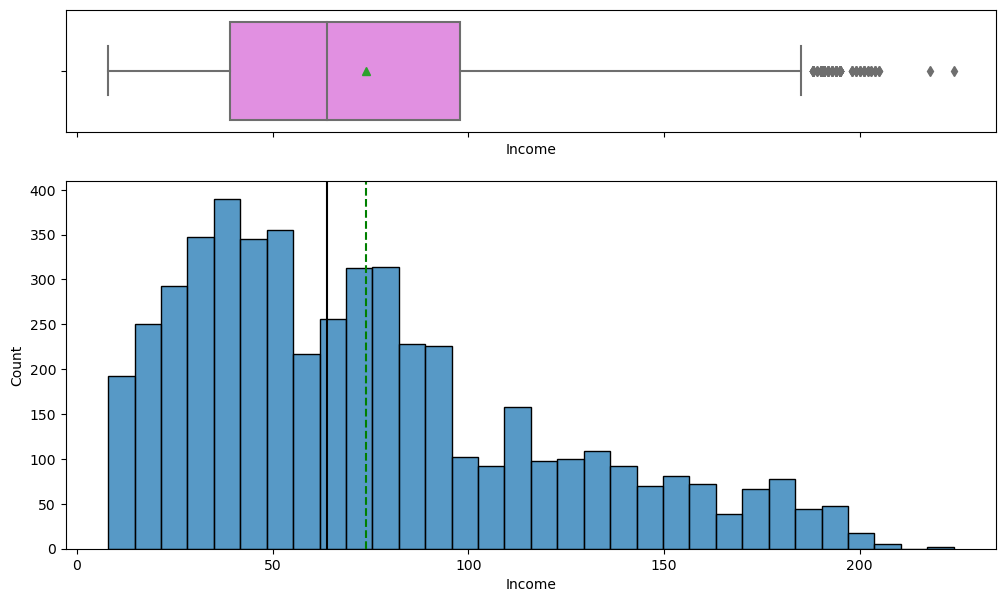

In [28]:
histogram_boxplot(data, 'Income')

#### Observations: Income has a very heavy skew to the right with massive outliers showing on the higher values. This makes sense because there are always the small 1% that have much higher outcomes than the majority of customers.

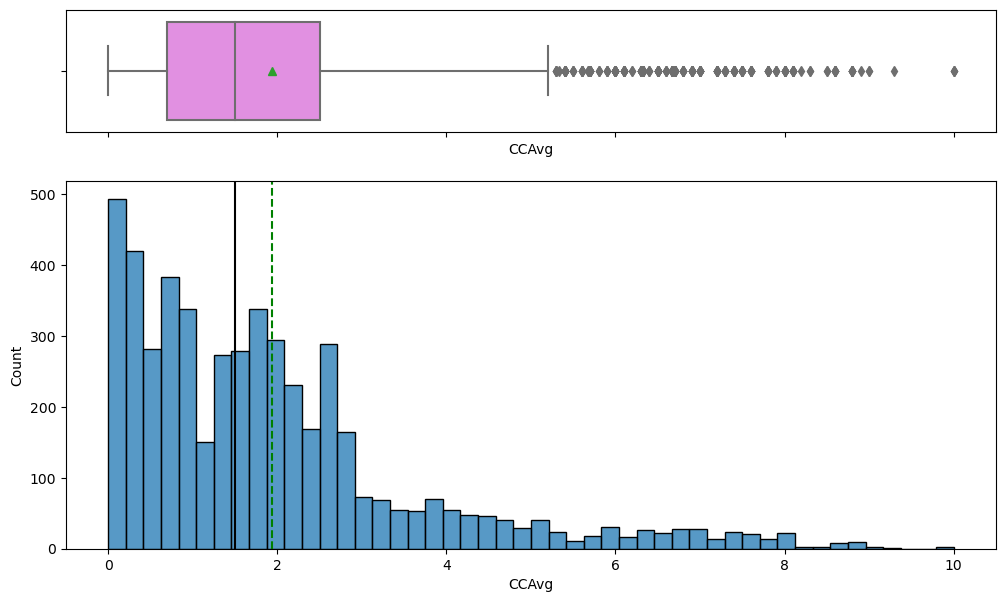

In [30]:
histogram_boxplot(data,'CCAvg')

#### Observations: Just like income, Credit Card Average spend also has a right skew with a lot of outliers on the higher values. This makes sense since those with higher incomes are likely to spend more on credit cards in a month.

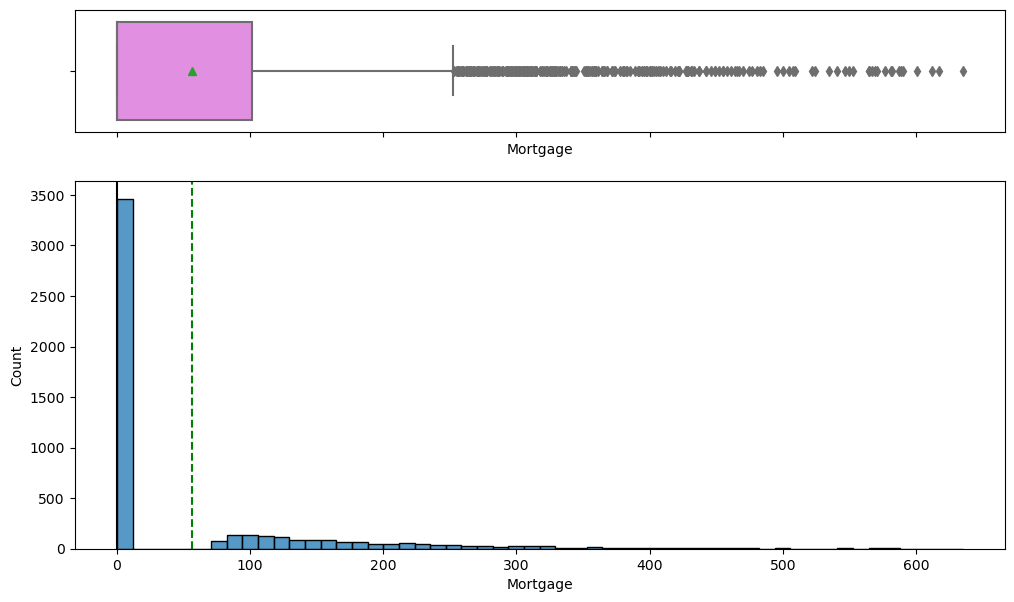

In [32]:
histogram_boxplot(data, 'Mortgage') 

#### Observations: The majority of customers do not have a mortgage at $0 a month. This causes major outliers on the right side of the boxplot. There is a heavy right skew in the data.

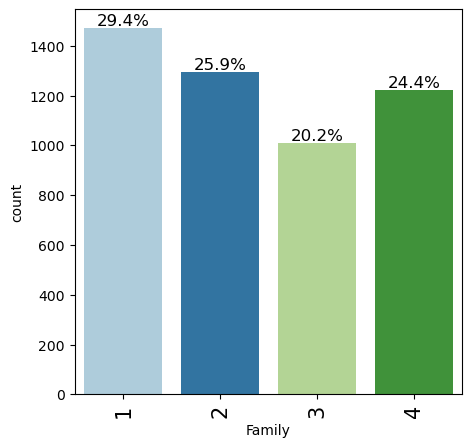

In [33]:
labeled_barplot(data, "Family", perc=True)

#### Observations: Around 75% of customers have a family size of 3 or lower. This most likely explains why the majority of people do not have a mortgage since family sizes of 3 do not feel the need to buy a house to settle down.

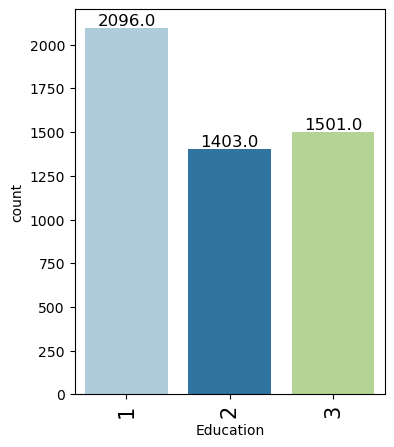

In [10]:
labeled_barplot(data, 'Education', perc='True')

#### Observations: Around 40% of customers have an education level of undergraduate. In the other customers, around 30% have graduate education and another 30% have professional education.

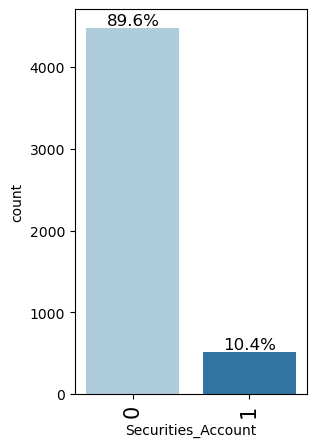

In [36]:
labeled_barplot(data, 'Securities_Account', perc=True)

#### Observations: 90% of the customers do not have a securities account with the bank. There is probably an extra fee associated that the customers do not want to pay.

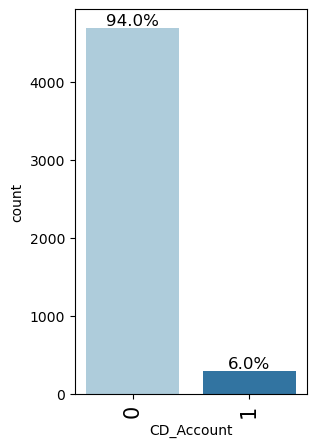

In [37]:
labeled_barplot(data,'CD_Account',perc=True)   ## Complete the code to create labeled_barplot for CD_Account

#### Observations: 94% of the customers do not have a certificate of deposit with the bank.

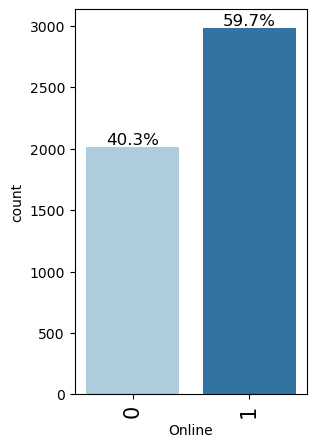

In [38]:
labeled_barplot(data,'Online',perc=True)

#### Observations: 60% of the customers use the internet banking features online. As the world grows digital, more users are open to utilizing the digital softwares of companies. 

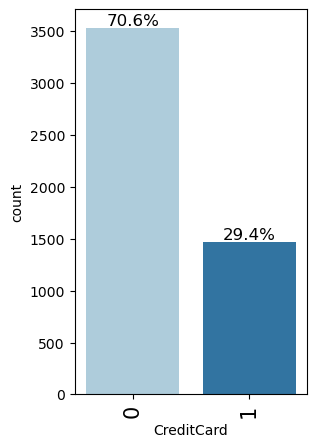

In [39]:
labeled_barplot(data, 'CreditCard', perc=True)

#### Observation: Only 30% of customers use a credit card issued by another bank. 70% of customers only use AllLife Bank's credit cards.

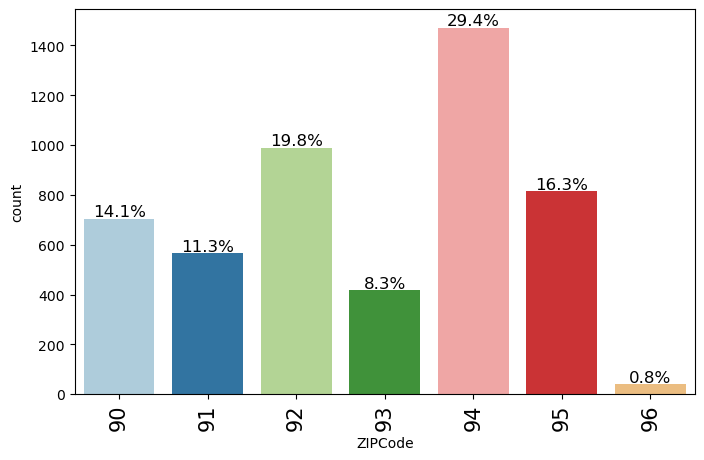

In [41]:
labeled_barplot(data, 'ZIPCode', perc=True)   ## Complete the code to create labeled_barplot for ZIPCode

#### Observation: After simplifying the ZIPCodes down, the ZIPCodes with the first 2 digits being '94' is the most common at 30% frequency. The '96' code is very rare at 1% frequency.

### Bivariate Analysis

In [9]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [7]:
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

#### Correlation

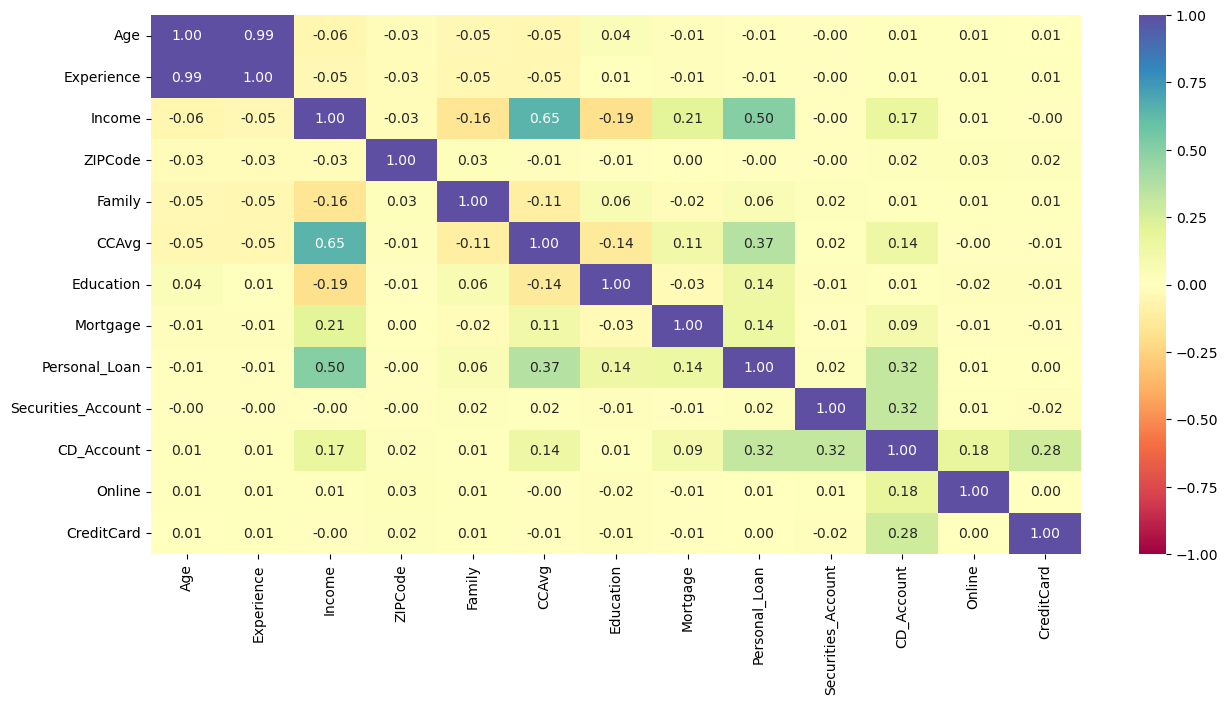

In [18]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral") # Complete the code to get the heatmap of the data
plt.show()

#### Observations: Age and Experience are highly correlated which logically makes sense. This can cause multicollinearity within the modeling. It may be important to consider dropping one of the two variables.

#### Credit card average spend is positively correlated with income. Customers with higher incomes can spend more on average with their credit cards.

#### Higher income users are also more likely to accept personal loans. With higher incomes, these customers are less risk averse and feel comfortable taking on debt.

#### Personal_Loan vs Family

Family            1     2     3     4   All
Personal_Loan                              
All            1472  1296  1010  1222  5000
0              1365  1190   877  1088  4520
1               107   106   133   134   480
------------------------------------------------------------------------------------------------------------------------


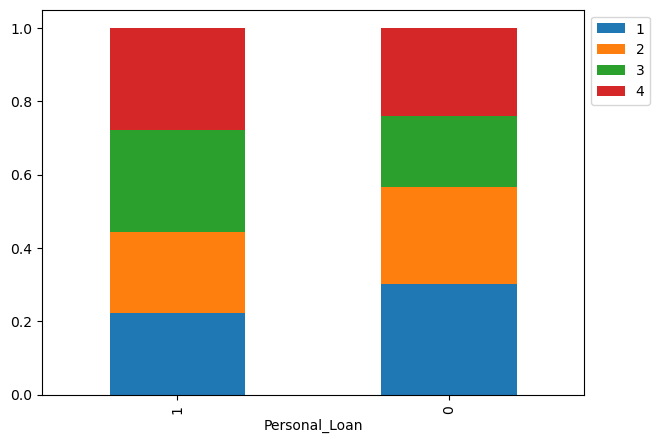

In [20]:
stacked_barplot(data,"Personal_Loan","Family")

#### Observations: Families of 3 and 4 are more likely to accept the loan while families of size 1 and 2 are less likely to accept the loan when looking at percentages. Generally people are much more likely to not accept a personal loan.

#### Personal_Loan vs Securities_Account

Securities_Account     0    1   All
Personal_Loan                      
All                 4478  522  5000
0                   4058  462  4520
1                    420   60   480
------------------------------------------------------------------------------------------------------------------------


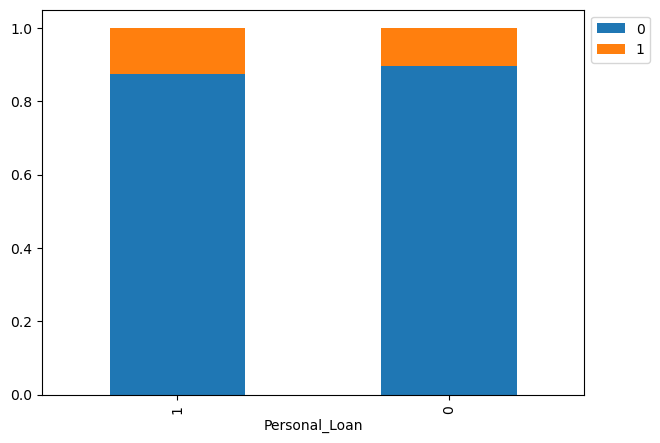

In [21]:
stacked_barplot(data,"Personal_Loan","Securities_Account") 

#### Personal_Loan vs CD_Account

CD_Account        0    1   All
Personal_Loan                 
All            4698  302  5000
0              4358  162  4520
1               340  140   480
------------------------------------------------------------------------------------------------------------------------


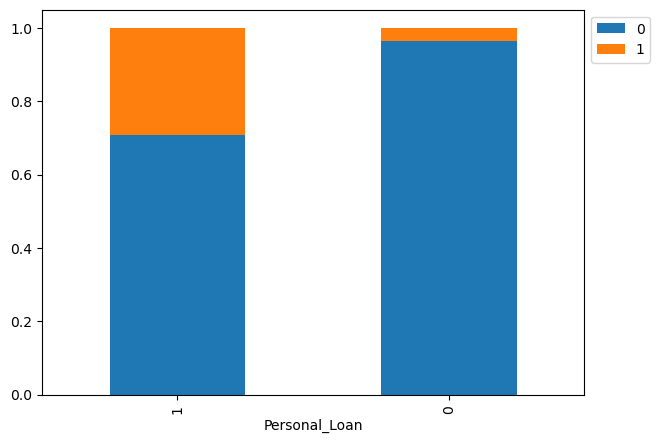

In [22]:
stacked_barplot(data,"Personal_Loan","CD_Account") 

#### Observations: People with Certificates of Deposit are more likely to take a personal loan.

#### Personal_Loan vs Online

Online            0     1   All
Personal_Loan                  
All            2016  2984  5000
0              1827  2693  4520
1               189   291   480
------------------------------------------------------------------------------------------------------------------------


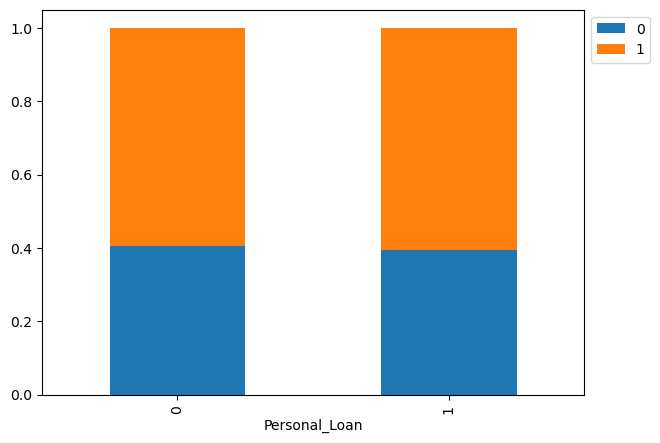

In [23]:
stacked_barplot(data,"Personal_Loan","Online")

#### Observations: Customers that use the online services of the bank do not seem to influence a person's choice on personal loan.

#### Personal_Loan vs CreditCard

CreditCard        0     1   All
Personal_Loan                  
All            3530  1470  5000
0              3193  1327  4520
1               337   143   480
------------------------------------------------------------------------------------------------------------------------


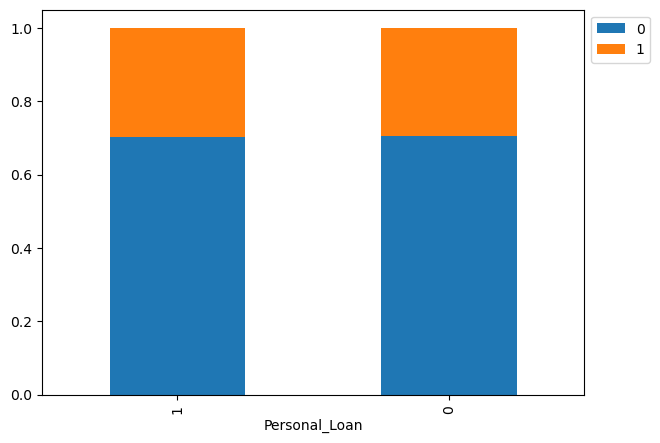

In [10]:
stacked_barplot(data,"Personal_Loan","CreditCard")

#### Observations: Customers that use the credit card of the bank do not seem to influence a person's choice on personal loan.

#### Personal_Loan vs ZIPCode

ZIPCode         90   91   92   93    94   95  96   All
Personal_Loan                                         
All            703  565  988  417  1472  815  40  5000
0              636  510  894  374  1334  735  37  4520
1               67   55   94   43   138   80   3   480
------------------------------------------------------------------------------------------------------------------------


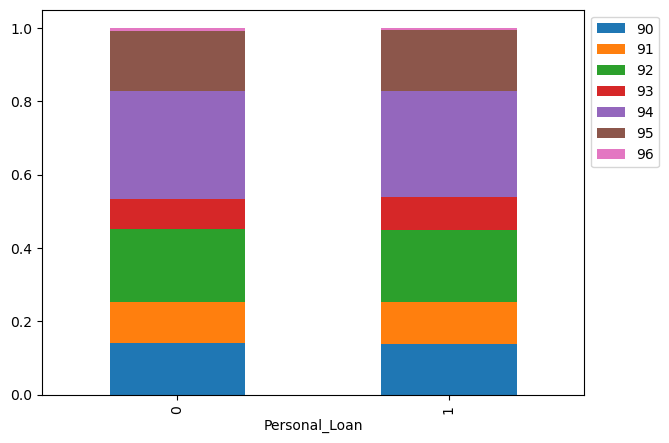

In [25]:
stacked_barplot(data,"Personal_Loan","ZIPCode")

#### Observations: Customers ZIPCodes do not seem to influence a person's choice on personal loan.

#### Let's check how a customer's interest in purchasing a loan varies with their age

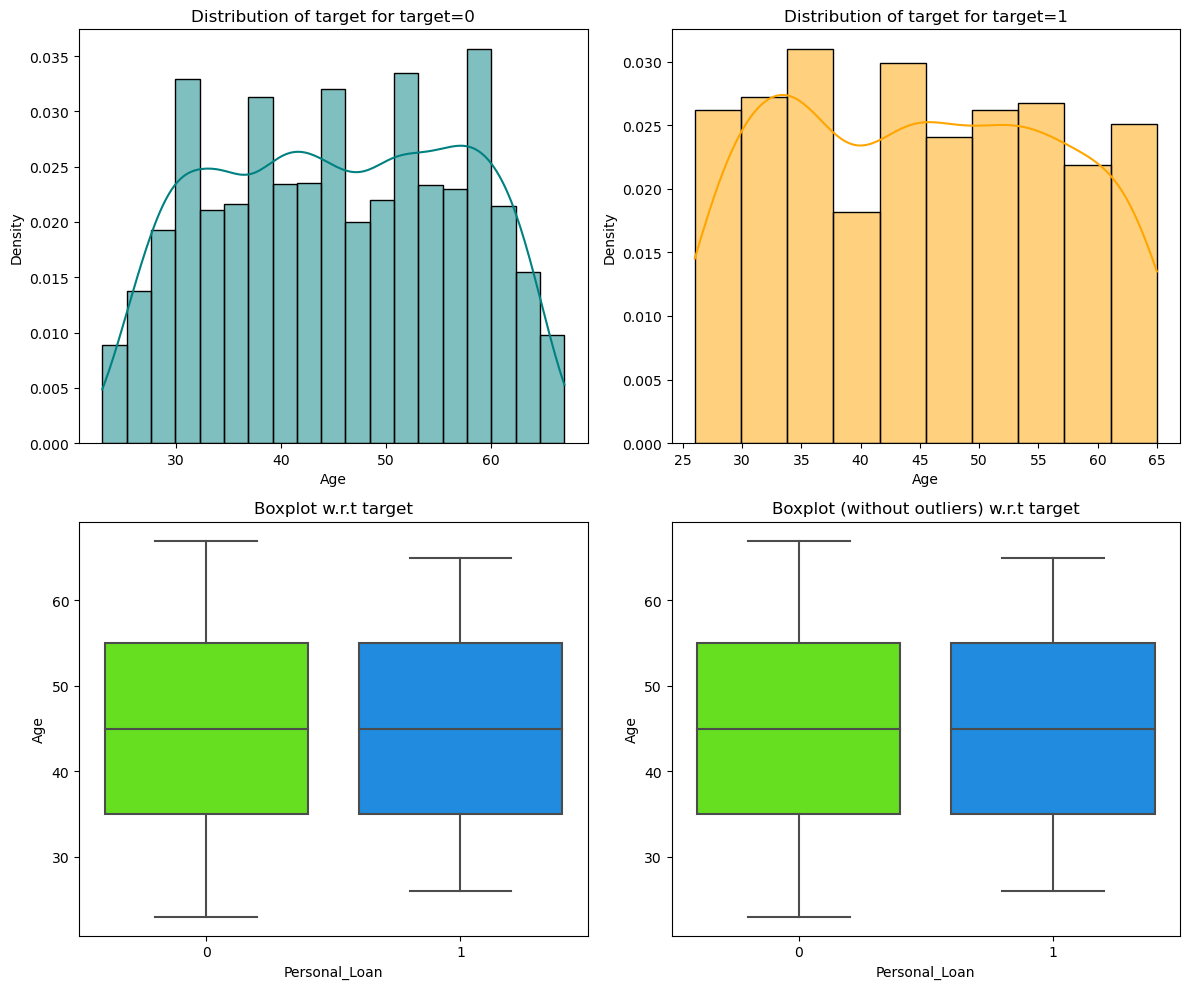

In [32]:
distribution_plot_wrt_target(data, "Age", "Personal_Loan")

#### Observations: There are no outliers in either group. Age does not seem to be a big indicator of taking a loan.

#### Experience vs Personal Loan

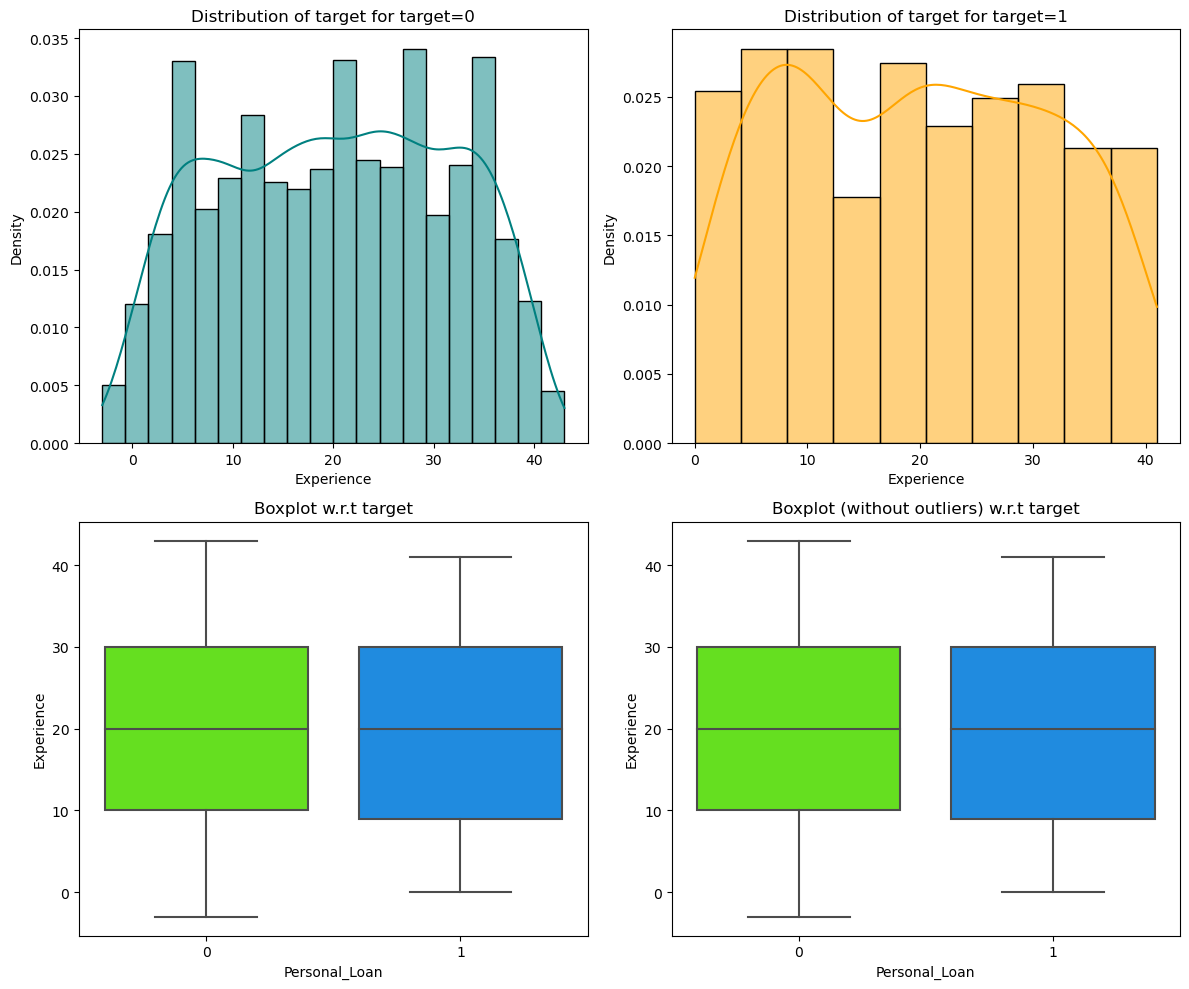

In [34]:
distribution_plot_wrt_target(data, "Experience", "Personal_Loan")

#### Observations: The distributions are similar across both groups.

#### Personal Loan vs Income

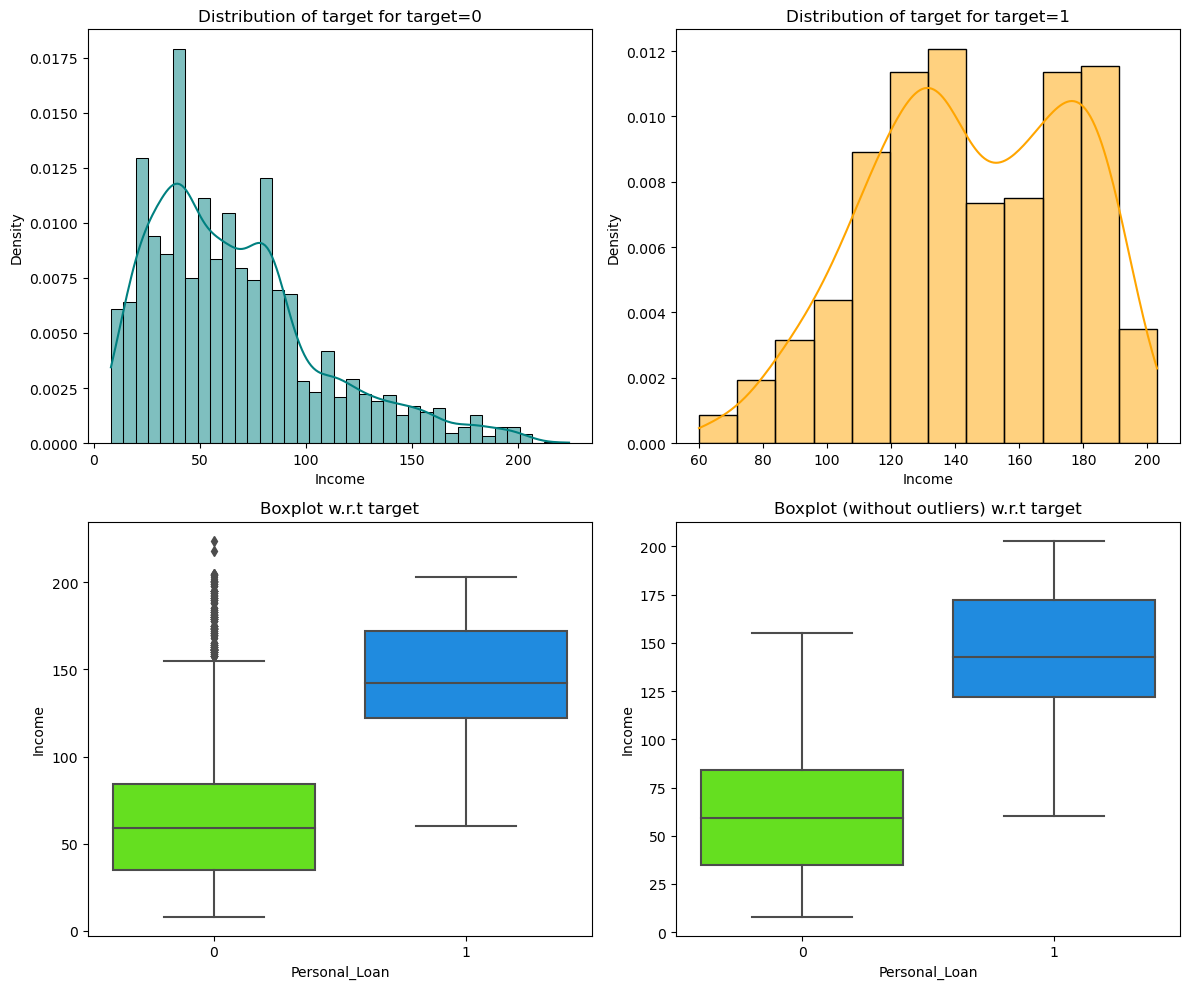

In [35]:
distribution_plot_wrt_target(data, "Income", "Personal_Loan") ## Complete the code to plot stacked barplot for Personal Loan and Income

#### Observations: The Income is right skewed for no personal loans while it is left skewed for the group taking the personal loan. This shows that people with higher incomes are much more likely to take the personal loan.

#### Personal Loan vs CCAvg

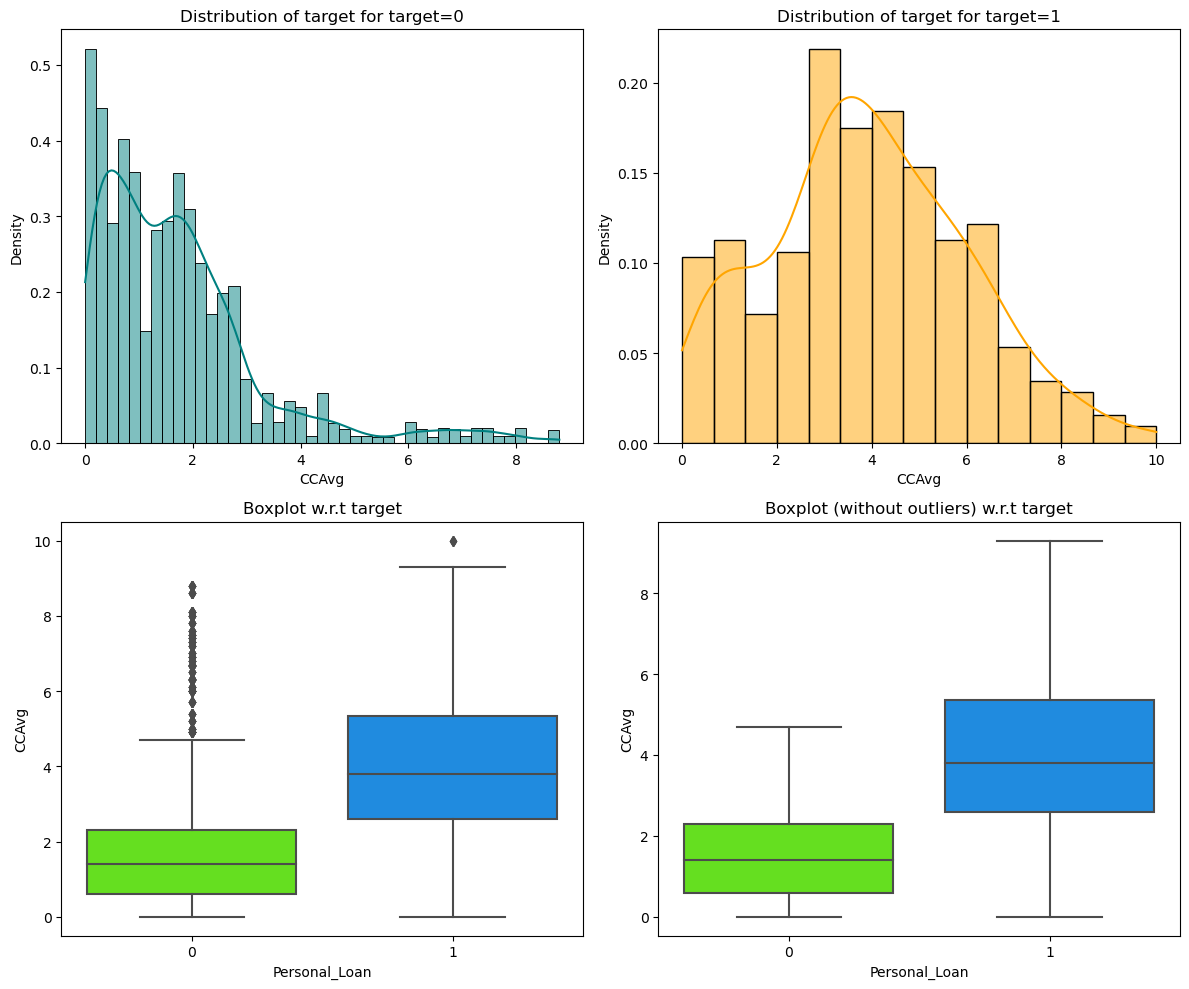

In [36]:
distribution_plot_wrt_target(data, "CCAvg", "Personal_Loan")

#### Observations: Customers with higher credit card average spend are much more likely to take on a loan.

#### Check for Missing Values

In [9]:
data.isna().any().any()

False

#### There are no missing values in the data.

### Data Preparation for Modeling

In [11]:
X = data.drop(["Personal_Loan", "Experience"], axis=1)
Y = data["Personal_Loan"]

X = pd.get_dummies(X, columns=["ZIPCode", "Education"], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [11]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 17)
Shape of test set :  (1500, 17)
Percentage of classes in training set:
Personal_Loan
0    0.905429
1    0.094571
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.900667
1    0.099333
Name: proportion, dtype: float64


#### Observation: To avoid multicollinearity, the Experience column is removed as it correlated with Age at 0.99. The data is split into train and test sets.

## Model Building

### Model Building

#### Defining Model Functions

In [12]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [13]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Build Decision Tree Model

In [14]:
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

#### Checking model performance on training data

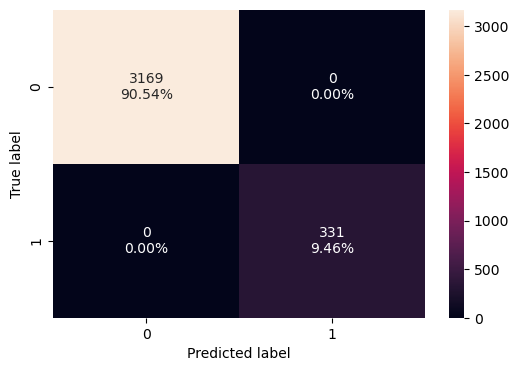

In [15]:
confusion_matrix_sklearn(model, X_train, y_train)

In [43]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


#### Observations: The model on the training dataset has a perfect accuracy score with no false negatives or positives. This is a perfect model for the training set.

#### Visualizing the Decision Tree

In [25]:
feature_names = list(X_train.columns)
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96', 'Education_2', 'Education_3']


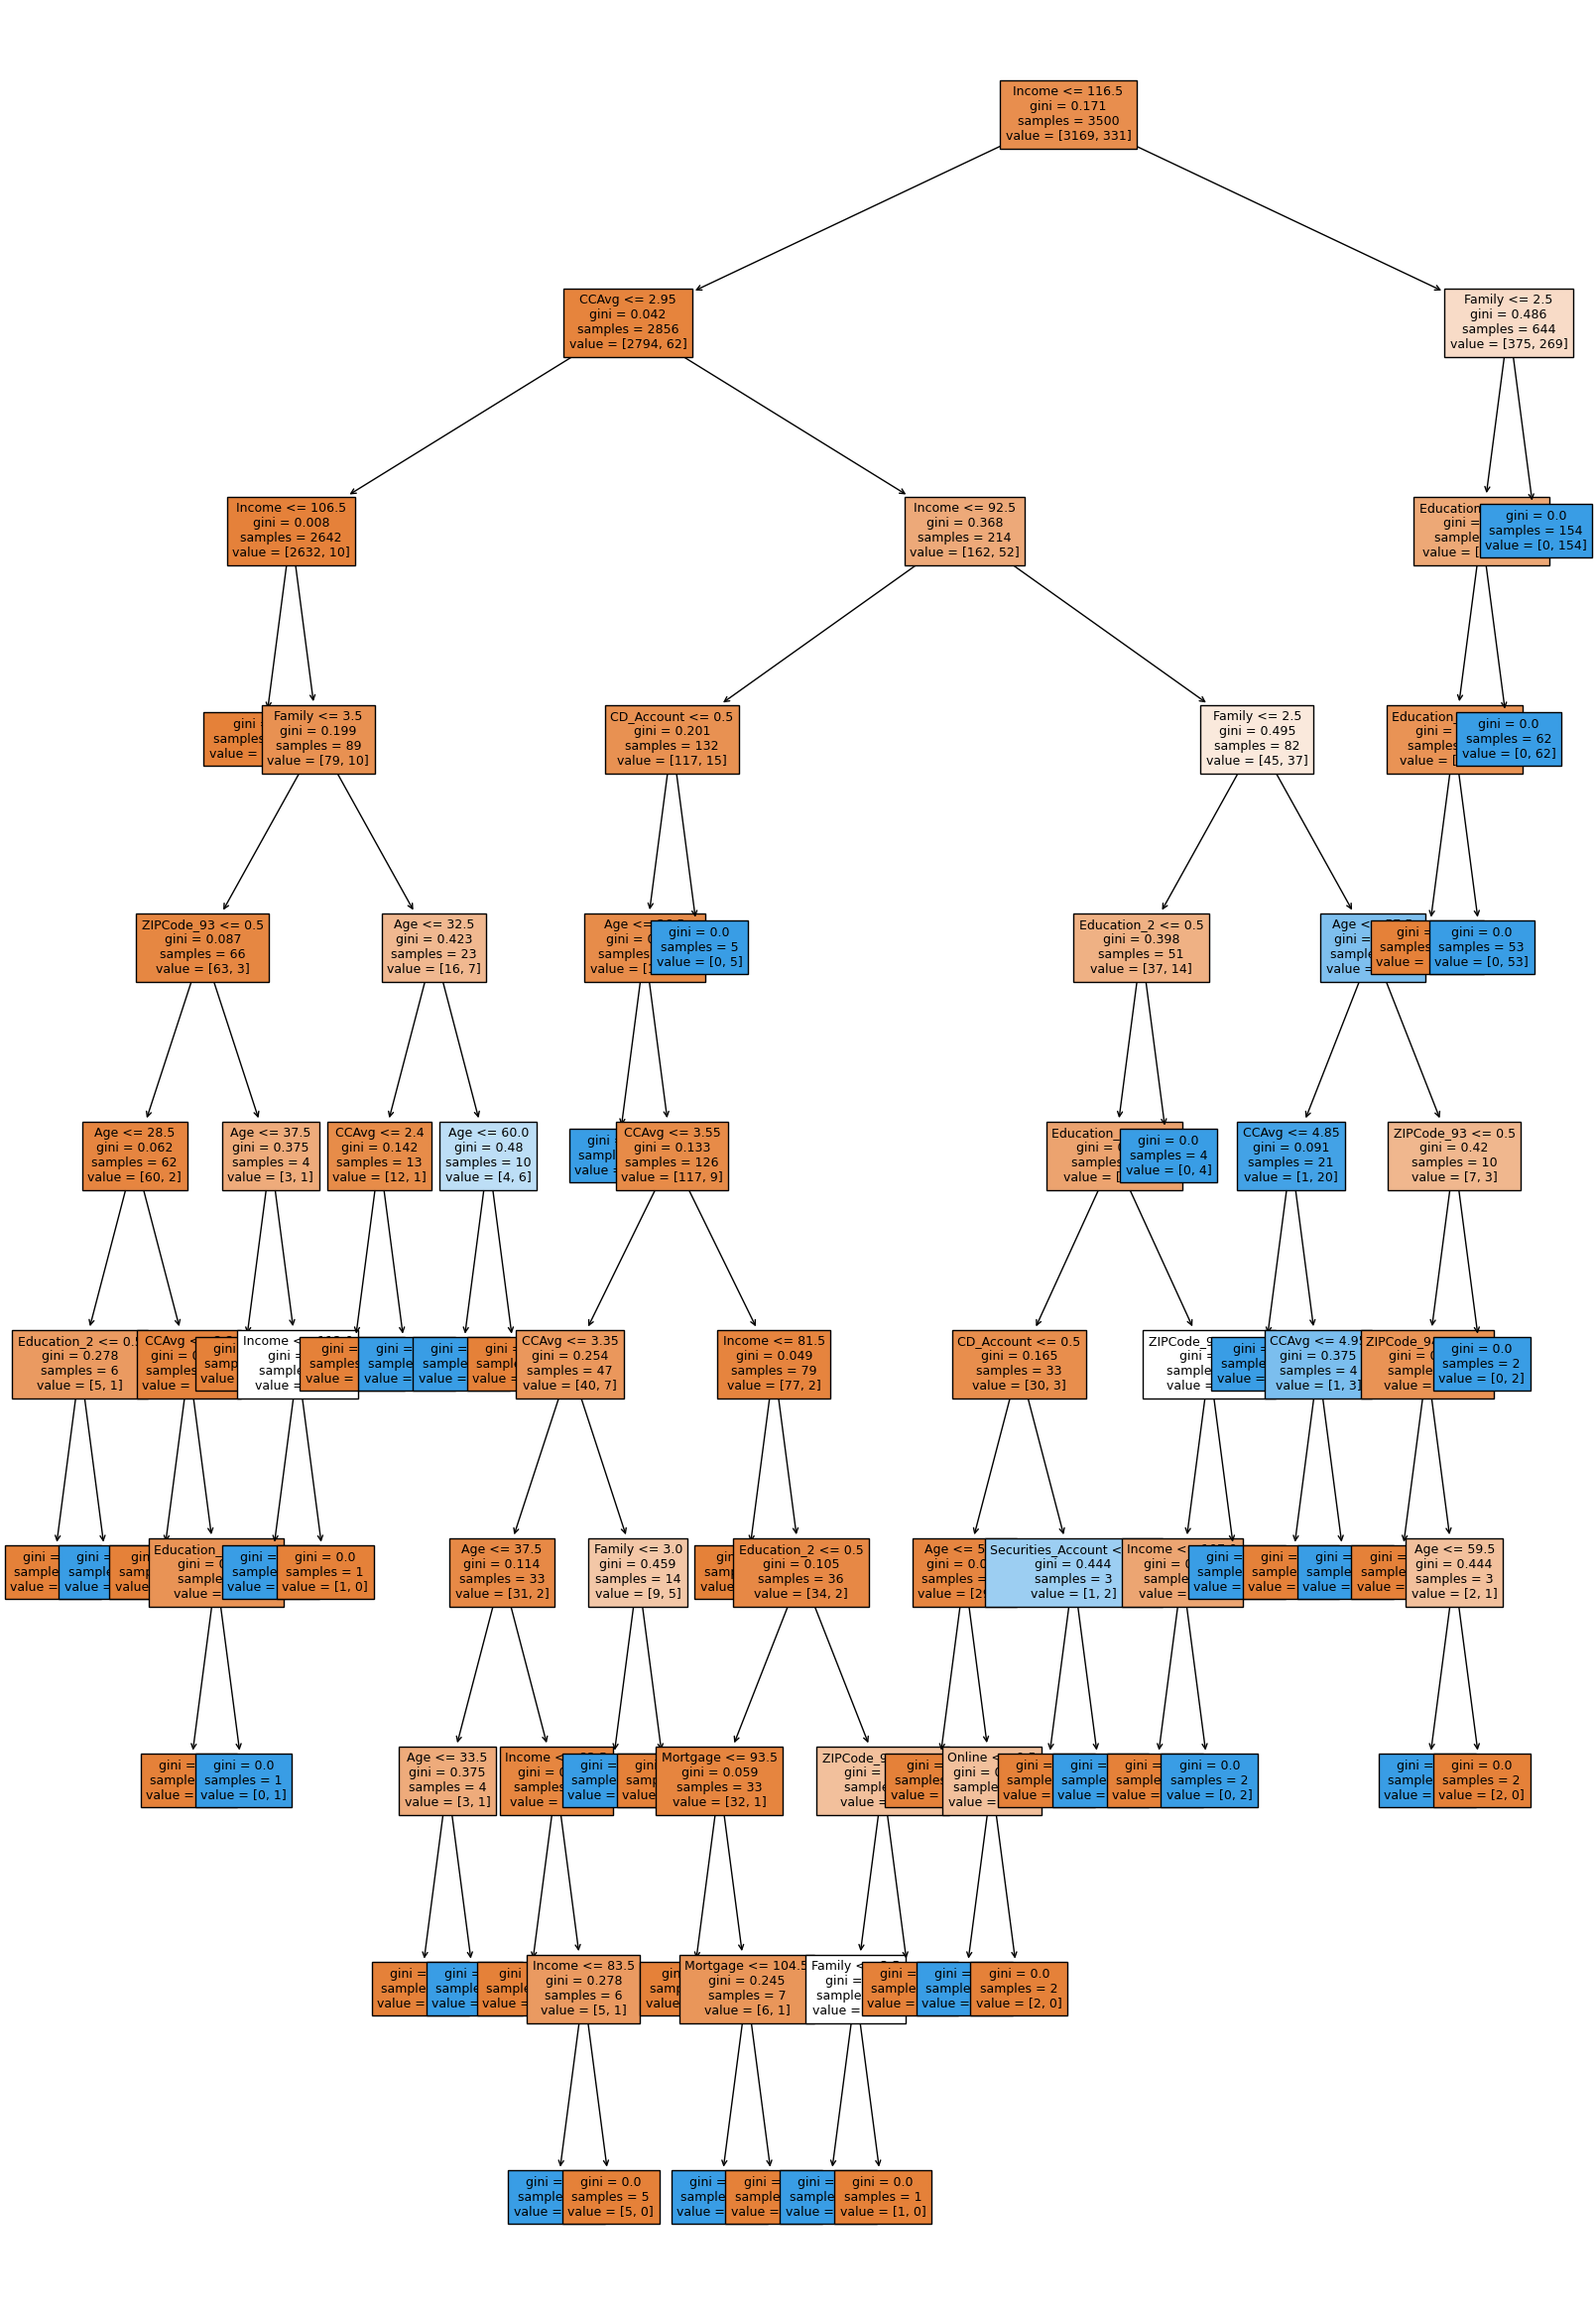

In [16]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [17]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ZIPCode_93 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- CCAvg <= 2.20
|   |   |   |   |   |   |   |--- weights: [48.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  2.20
|   |   |   |   |   |   |   |--- Education_3 <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [7.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_3 >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- ZIPCode_93 >  0.50
|   |   |   |   |   |--- Age <= 37.50

In [18]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.308098
Family              0.259255
Education_2         0.166192
Education_3         0.147127
CCAvg               0.048798
Age                 0.033150
CD_Account          0.017273
ZIPCode_94          0.007183
ZIPCode_93          0.004682
Mortgage            0.003236
Online              0.002224
Securities_Account  0.002224
ZIPCode_91          0.000556
ZIPCode_92          0.000000
ZIPCode_95          0.000000
ZIPCode_96          0.000000
CreditCard          0.000000


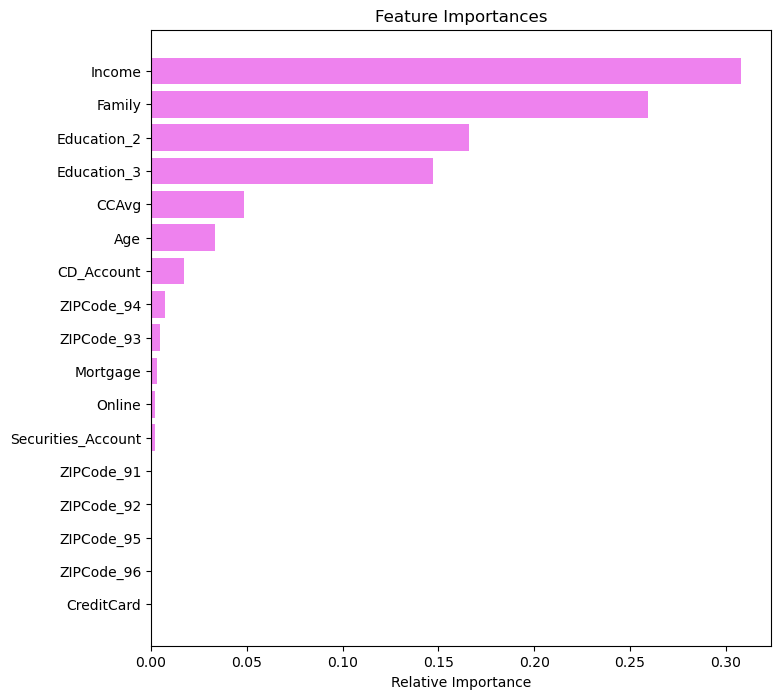

In [19]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Checking model performance on test data

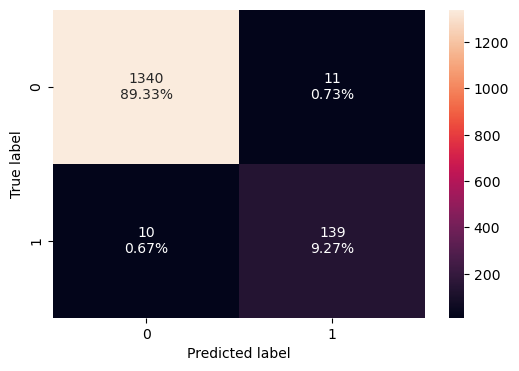

In [18]:
confusion_matrix_sklearn(model, X_test, y_test) 

In [19]:
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.986,0.932886,0.926667,0.929766


#### Observations: The original decision tree model has a strong accuracy at 98.6%. The higher recall compared to precisiom shows that the model is likely to most of the relevant results.

## Model Performance Improvement

#### Pre-Pruning

In [20]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(6, 15),
    "min_samples_leaf": [1, 2, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train) 

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10, min_samples_leaf=10,
                       random_state=1)

**Checking performance on training data**

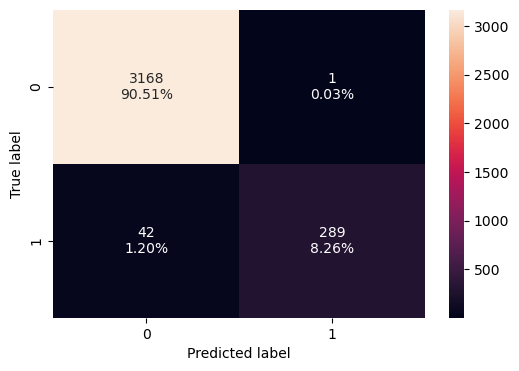

In [21]:
confusion_matrix_sklearn(estimator, X_train, y_train) 

In [44]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(estimator, X_train, y_train)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.987714,0.873112,0.996552,0.930757


#### Observation: By adding grid search cv hyperparameter tuning to the model, we decrease accuracy slightly but the precision of the model is stronger with only one false positive.

**Visualizing the Decision Tree**

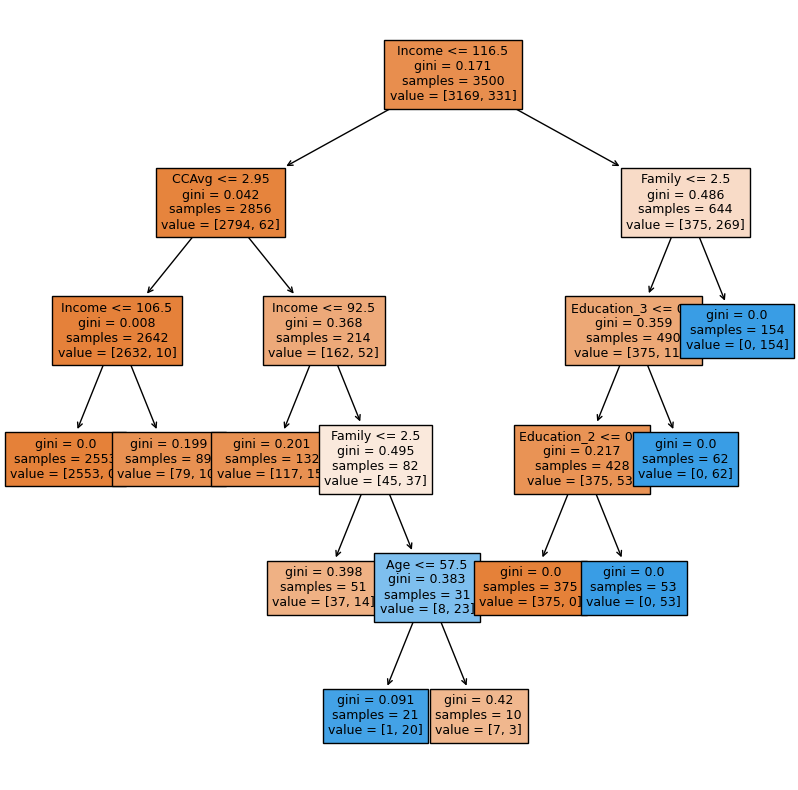

In [26]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [34]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- weights: [79.00, 10.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- weights: [117.00, 15.00] class: 0
|   |   |--- Income >  92.50
|   |   |   |--- Family <= 2.50
|   |   |   |   |--- weights: [37.00, 14.00] class: 0
|   |   |   |--- Family >  2.50
|   |   |   |   |--- Age <= 57.50
|   |   |   |   |   |--- weights: [1.00, 20.00] class: 1
|   |   |   |   |--- Age >  57.50
|   |   |   |   |   |--- weights: [7.00, 3.00] class: 0
|--- Income >  116.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- weights: [375.00, 0.00] class: 0
|   |   |   |--- Education_2 >  0.50
|   |   |   |   |--- weights: [0.00, 53.00] class: 1
|   |   |--- Education_3 >  0.50
|   |   |   |--- weights: [0.00, 62.00] class: 1
|   |--- Family >  2.

In [35]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.337681
Family              0.275581
Education_2         0.175687
Education_3         0.157286
CCAvg               0.042856
Age                 0.010908
CD_Account          0.000000
Online              0.000000
Securities_Account  0.000000
ZIPCode_91          0.000000
ZIPCode_92          0.000000
ZIPCode_93          0.000000
ZIPCode_94          0.000000
ZIPCode_95          0.000000
ZIPCode_96          0.000000
Mortgage            0.000000
CreditCard          0.000000


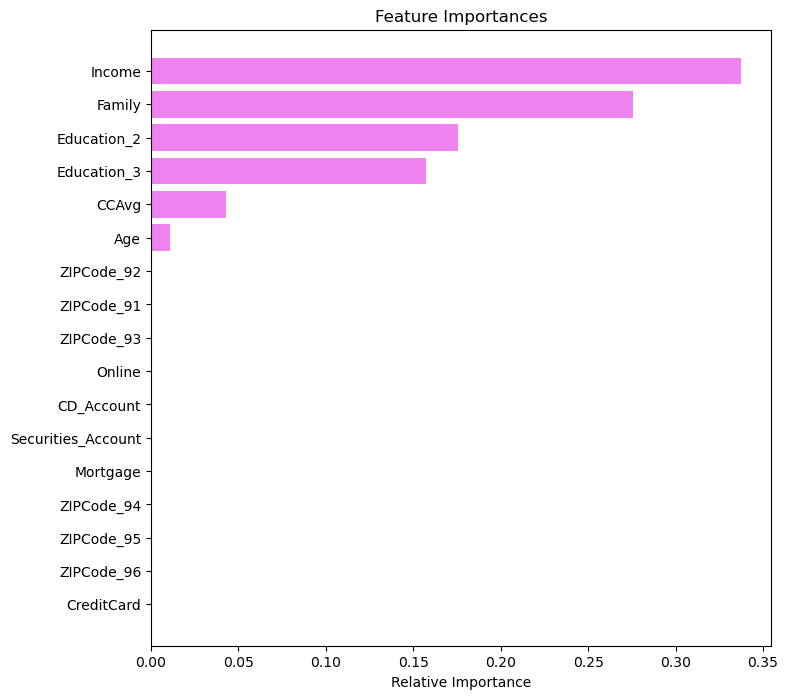

In [36]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Checking performance on test data**

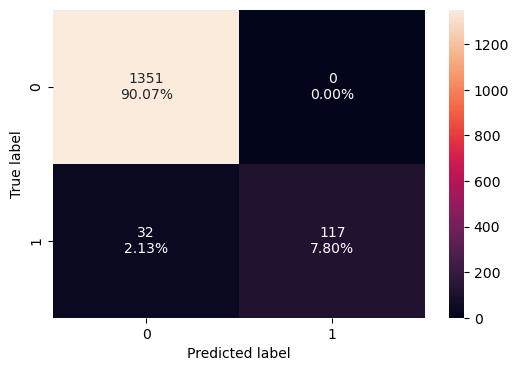

In [27]:
confusion_matrix_sklearn(estimator, X_test, y_test) 

In [28]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(estimator, X_test, y_test) 
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.978667,0.785235,1.0,0.879699


#### Observations: The test data with hyperparameter tuning results in perfect precision meaning there are no false positives.

#### Cost-Complexity Pruning

In [29]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [30]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000186,0.001114
2,0.000214,0.001542
3,0.000242,0.002750
4,0.000250,0.003250
5,0.000268,0.004324
6,0.000272,0.004868
7,0.000276,0.005420
8,0.000381,0.005801
9,0.000527,0.006329


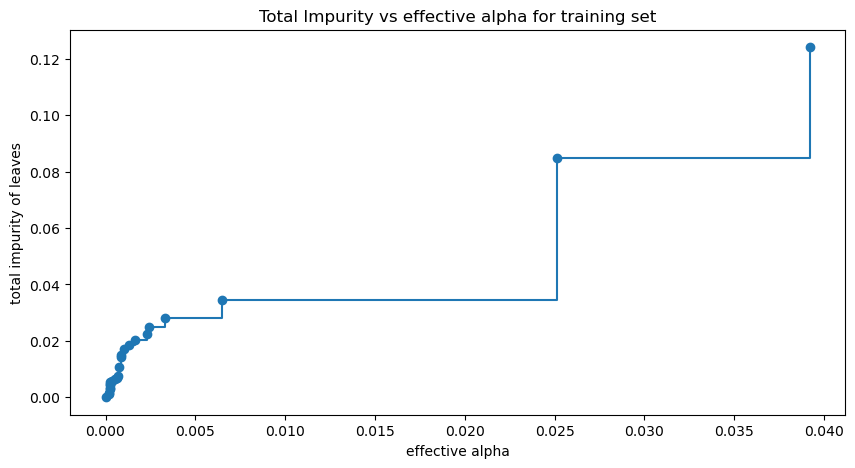

In [43]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [31]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)     ## Complete the code to fit decision tree on training data
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.04708834100596766


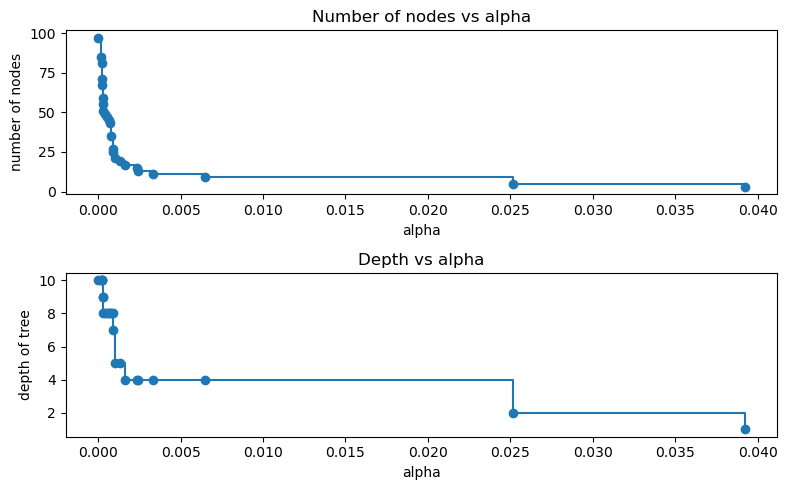

In [32]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(8, 5))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

**Recall vs alpha for training and testing sets**

In [33]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

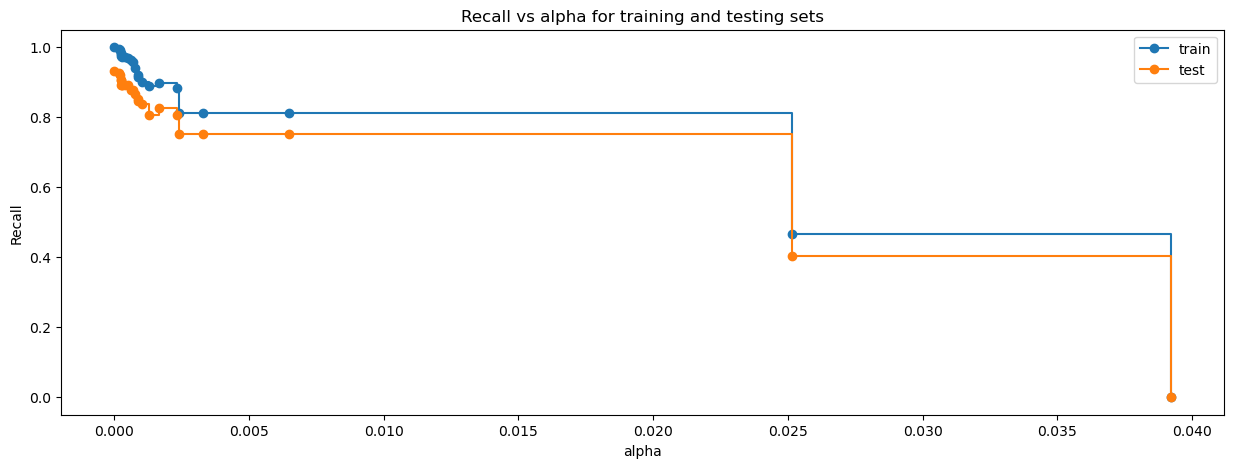

In [34]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [35]:
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(random_state=1)


#### Post-Pruning

In [36]:
estimator_2 = DecisionTreeClassifier(
    ccp_alpha=0.025, class_weight={0: 0.15, 1: 0.85}, random_state=1         ## Complete the code by adding the correct ccp_alpha value
)
estimator_2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.025, class_weight={0: 0.15, 1: 0.85},
                       random_state=1)

**Checking performance on training data**

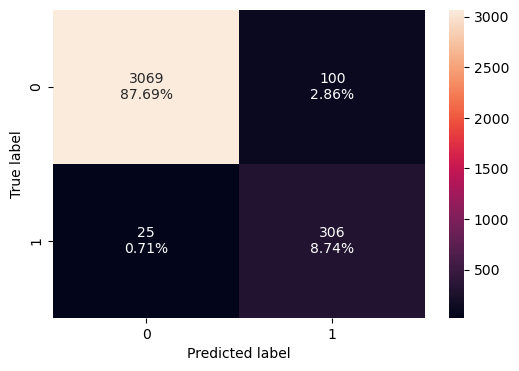

In [37]:
confusion_matrix_sklearn(estimator_2, X_train, y_train) 

In [38]:
decision_tree_tune_post_train = model_performance_classification_sklearn(estimator_2, X_train, y_train) ## Complete the code to check performance on train data
decision_tree_tune_post_train

,Accuracy,Recall,Precision,F1
0,0.964286,0.924471,0.753695,0.830393


**Visualizing the Decision Tree**

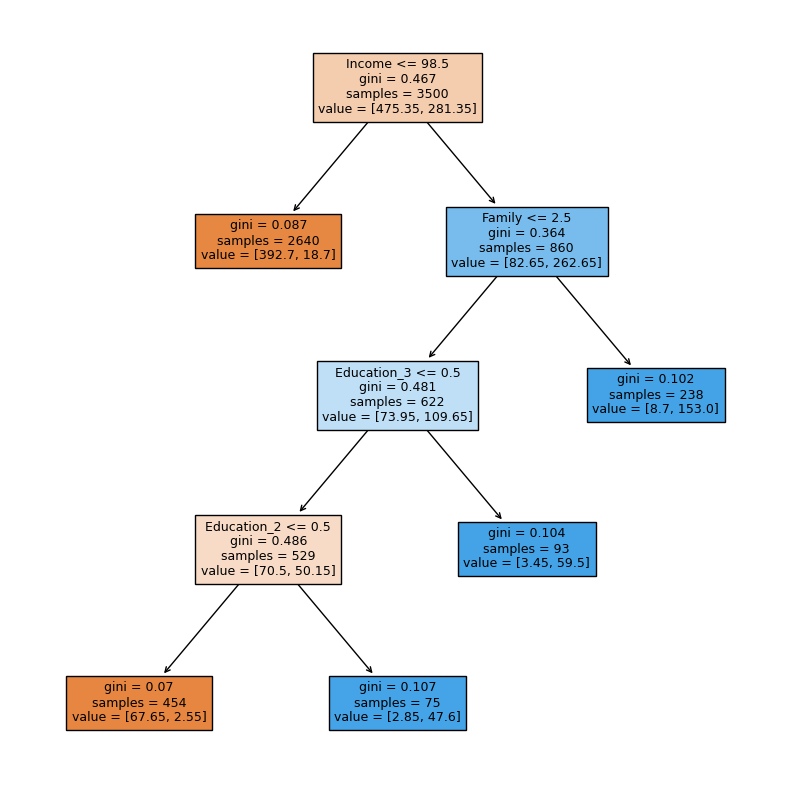

In [39]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator_2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [55]:
print(tree.export_text(estimator_2, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- weights: [392.70, 18.70] class: 0
|--- Income >  98.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- weights: [67.65, 2.55] class: 0
|   |   |   |--- Education_2 >  0.50
|   |   |   |   |--- weights: [2.85, 47.60] class: 1
|   |   |--- Education_3 >  0.50
|   |   |   |--- weights: [3.45, 59.50] class: 1
|   |--- Family >  2.50
|   |   |--- weights: [8.70, 153.00] class: 1



In [56]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator_2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.675027
Education_2         0.169826
Education_3         0.081541
Family              0.073607
ZIPCode_92          0.000000
ZIPCode_96          0.000000
ZIPCode_95          0.000000
ZIPCode_94          0.000000
ZIPCode_93          0.000000
Age                 0.000000
ZIPCode_91          0.000000
Online              0.000000
CD_Account          0.000000
Securities_Account  0.000000
Mortgage            0.000000
CCAvg               0.000000
CreditCard          0.000000


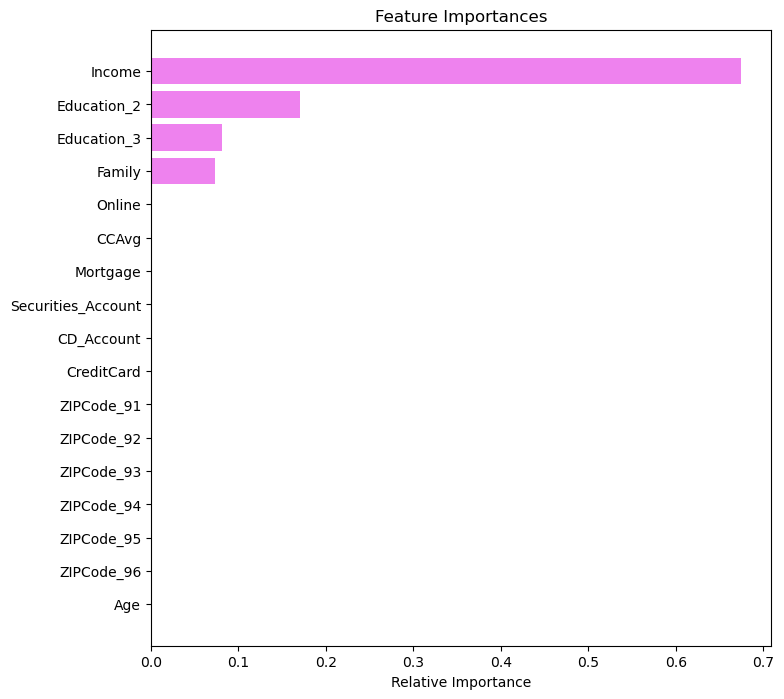

In [57]:
importances = estimator_2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Checking performance on test data**

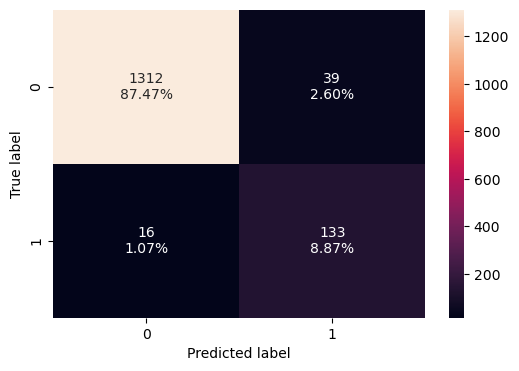

In [40]:
confusion_matrix_sklearn(estimator_2, X_test, y_test)  # Complete the code to get the confusion matrix on test data

In [41]:
decision_tree_tune_post_test = model_performance_classification_sklearn(estimator_2, X_test, y_test) ## Complete the code to get the model performance on test data
decision_tree_tune_post_test

,Accuracy,Recall,Precision,F1
0,0.963333,0.892617,0.773256,0.82866


#### Observations: The model with cost complexity pruning shows worse precision, recall, and accuracy compared to the first model.

## Model Performance Comparison and Final Model Selection

In [45]:
# training performance comparison

models_train_comp_df = pd.concat(
    [decision_tree_perf_train.T, decision_tree_tune_perf_train.T], axis=1,
)
models_train_comp_df.columns = ["Decision Tree sklearn", "Decision Tree (Pre-Pruning)"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning)
Accuracy,1.0,0.987714
Recall,1.0,0.873112
Precision,1.0,0.996552
F1,1.0,0.930757


In [46]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [decision_tree_perf_test.T, decision_tree_tune_perf_test.T], axis=1, ## Complete the code to compare performance of test set
)
models_test_comp_df.columns = ["Decision Tree sklearn", "Decision Tree (Pre-Pruning)"]
print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning)
Accuracy,0.986000,0.978667
Recall,0.932886,0.785235
Precision,0.926667,1.000000
F1,0.929766,0.879699


## Actionable Insights and Business Recommendations

**What recommedations would you suggest to the bank?**

* The best model to implement is the Decision tree pre-pruned along with GridSearchCV hyperparameter tuning due to the model having a perfect precision score on the test data. A perfect precision score means that there is no chance of getting a false positive or Type I error. This means if we identify a customer as a person willing to take a loan, it is always going to be a true positive. This way we maximize our probability of identifying loan seeking customers.

* For this model, the feature importances in order are Income, Family, Master's Education, Advanced/Professional Education, Credit Card spend, and Age. It is clear from the charts that the two strongest indicators of willingness to take on a loan are Income and Family size. A higher income and family size result indicate a higher likelihood of taking the loan.

* The other variables such as Age, Credit Card spend, and Educations are not as relevant to focus on due to their variance being explained within Family Size and Income. Higher credit card spend is explained by greater income and need to spend to maintain bigger family size. When talking with customers it is important to identify their Income and Family Size as the primary indicators explaining their willingness to take a loan.

___